In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\peter\AppData\Local\Temp\ipykernel_16448\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sentiment_data = pd.read_csv("C:/Users/peter/Documents/Data Science/Final Project/Data/TweetsCounts2021_2022.csv")

In [3]:
sentiment_data.head()

,datetime,Negative,Positive,Neutral1,Neutral2,objective,subjective
0,2021-01-01 00:00:00,132,450,252,35,487,312
1,2021-01-01 01:00:00,148,419,363,33,592,305
2,2021-01-01 02:00:00,111,343,257,28,457,226
3,2021-01-01 03:00:00,93,277,209,16,376,187
4,2021-01-01 04:00:00,66,282,188,26,341,169


In [4]:
sentiment_data['datetime'] = pd.to_datetime(sentiment_data['datetime'])

In [5]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    13104 non-null  datetime64[ns]
 1   Negative    13104 non-null  int64         
 2   Positive    13104 non-null  int64         
 3   Neutral1    13104 non-null  int64         
 4   Neutral2    13104 non-null  int64         
 5   objective   13104 non-null  int64         
 6   subjective  13104 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 716.8 KB


In [6]:
sentiment_data.describe()

,datetime,Negative,Positive,Neutral1,Neutral2,objective,subjective
count,13104,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000
mean,2021-09-30 23:30:00.000000256,217.229548,522.805327,361.631258,47.200702,736.626984,317.838446
min,2021-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-05-17 11:45:00,141.000000,364.000000,250.000000,32.000000,508.000000,218.000000
50%,2021-09-30 23:30:00,187.000000,467.000000,319.000000,43.000000,651.000000,283.000000
75%,2022-02-14 11:15:00,253.000000,609.000000,421.000000,56.000000,856.000000,372.000000
max,2022-06-30 23:00:00,2947.000000,9508.000000,5014.000000,460.000000,9665.000000,3254.000000
std,NaN,132.729564,282.475019,195.164320,24.195668,396.979700,164.657441


In [7]:
sentiment_data.isnull().sum()

datetime      0
Negative      0
Positive      0
Neutral1      0
Neutral2      0
objective     0
subjective    0
dtype: int64

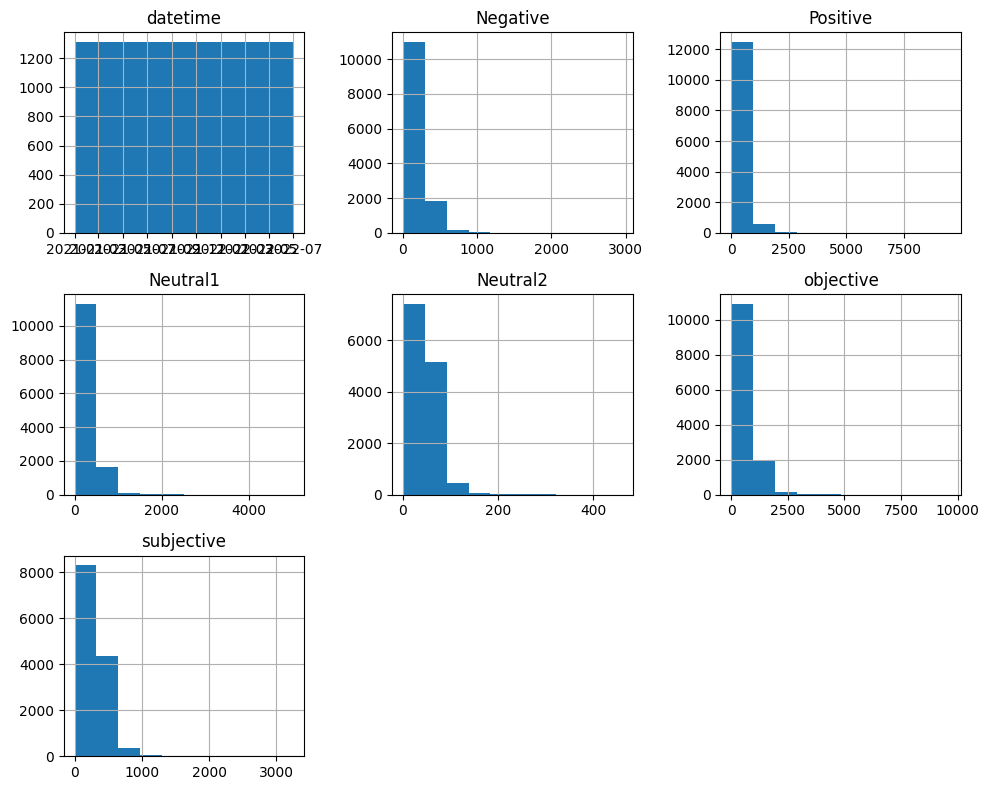

In [8]:
sentiment_data.hist(figsize = (10, 8))
plt.tight_layout()
plt.show()

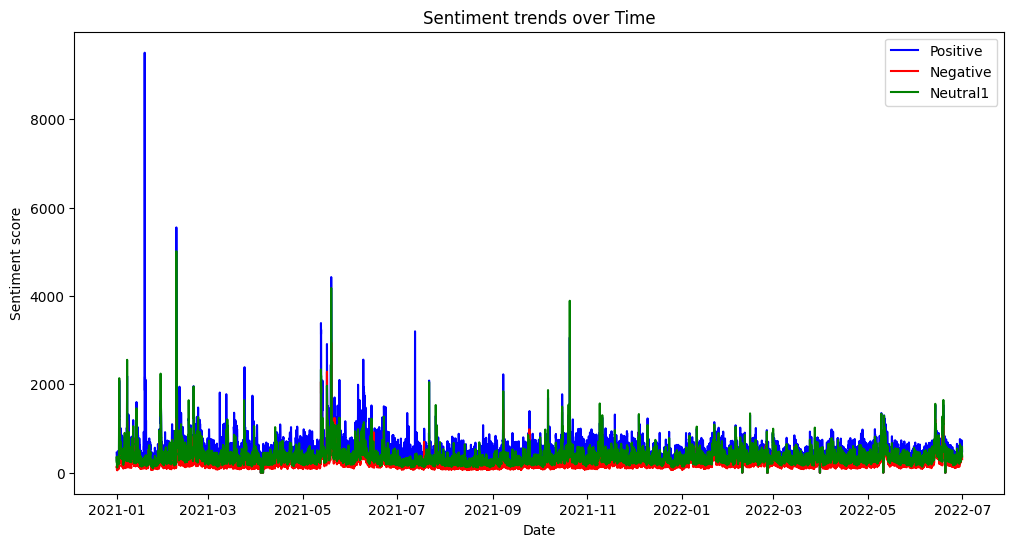

In [9]:
# Line plot for sentiment trends over time

plt.figure(figsize=(12, 6))
plt.plot(sentiment_data['datetime'], sentiment_data['Positive'], label='Positive', color='blue')
plt.plot(sentiment_data['datetime'], sentiment_data['Negative'], label='Negative', color='red')
plt.plot(sentiment_data['datetime'], sentiment_data['Neutral1'], label='Neutral1', color='green')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.title('Sentiment trends over Time')
plt.legend()
plt.show()

In [10]:
# Aggregate sentiment scores by day

sentiment_data['date'] = sentiment_data['datetime'].dt.date
daily_sentiment = sentiment_data.groupby('date').mean()

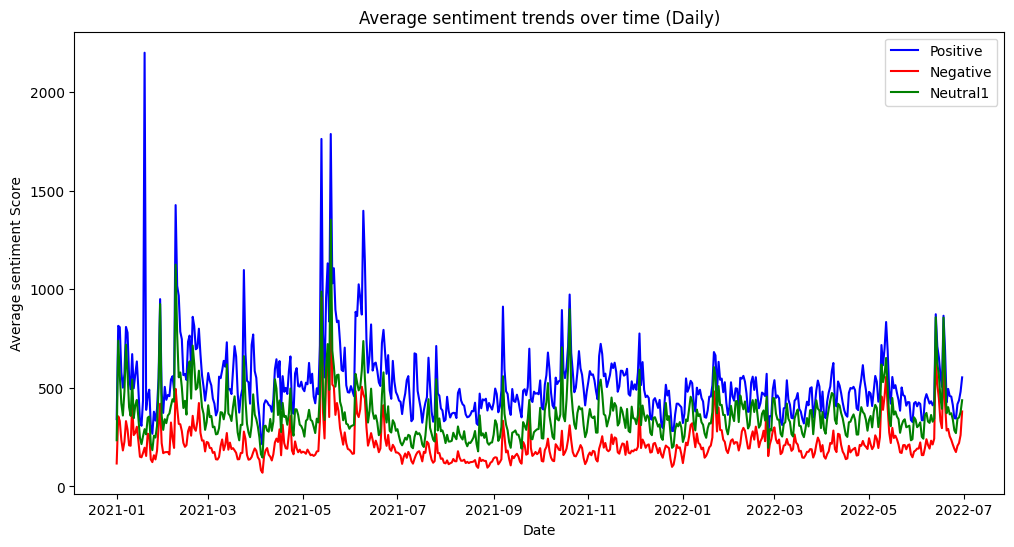

In [11]:
# Plot average sentiment scores over time

plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment['Positive'], label='Positive', color='blue')
plt.plot(daily_sentiment.index, daily_sentiment['Negative'], label='Negative', color='red')
plt.plot(daily_sentiment.index, daily_sentiment['Neutral1'], label='Neutral1', color='green')
plt.xlabel('Date')
plt.ylabel('Average sentiment Score')
plt.title('Average sentiment trends over time (Daily)')
plt.legend()
plt.show()

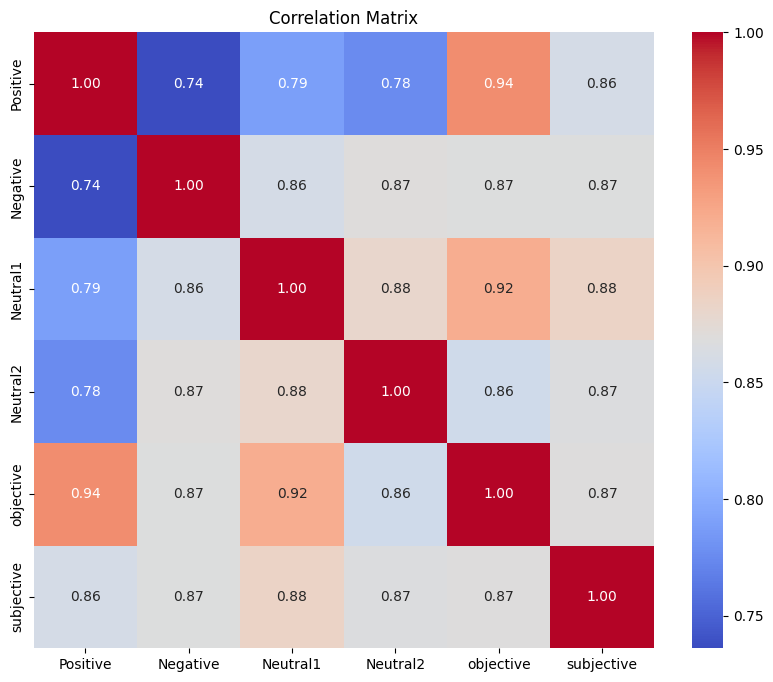

In [12]:
correlation_matrix = sentiment_data[['Positive', 'Negative', 'Neutral1', 'Neutral2', 'objective', 'subjective']].corr()

# Correlation Matrix Visualization

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()